In [1]:
inputEntries=156503

tenth = int(inputEntries / 10)

print(tenth)

tenth_counter = 1
print("Progress at 0%")
for entry in range(inputEntries):
        if ( entry+1 == tenth_counter*tenth ):
          print(tenth_counter * 10, "%...")
          tenth_counter=tenth_counter+1;
   

15650
Progress at 0%
10 %...
20 %...
30 %...
40 %...
50 %...
60 %...
70 %...
80 %...
90 %...
100 %...


In [1]:
import os, sys
sys.path.append('CommonUtils/')
import CommonUtils as cu
sys.path.append(os.environ["JUPYROOT"]) 
import RUtils as ru

import math
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from scipy import optimize

dataXY, n_binsXY, dBinsXY = ru.hist2np(file_path="DATA/VLEDM.root", hist_path="AllStationsNoTQ/VertexExt/t>0/0<p<3600/thetay_vs_time_modg2")
df_data=cu.Profile(dataXY[0], dataXY[1], False, nbins=15, xmin=np.min(dataXY[0]),xmax=np.max(dataXY[0]), full_y=True, only_binned=True)

Welcome to JupyROOT 6.18/04
RUtils::hist2np Opening AllStationsNoTQ/VertexExt/t>0/0<p<3600/thetay_vs_time_modg2 in DATA/VLEDM.root
RUtils::hist2np Opened Name: thetay_vs_time_modg2 Title:   NbinsX: 300 <class 'float'> with 5243759 entries (exc. over/underflows)


In [2]:
df_data

,bincenters,y,xerr,yerr
1,0.152301,"[-0.09835, -0.09765000000000001, -0.0975500000...",0.145026,0.000043
2,0.442353,"[-0.09975, -0.09945000000000001, -0.0994500000...",0.145026,0.000042
3,0.732404,"[-0.09915000000000002, -0.09905000000000001, -...",0.145026,0.000041
4,1.022456,"[-0.09935000000000001, -0.09915000000000002, -...",0.145026,0.000039
5,1.312507,"[-0.09995000000000001, -0.09995000000000001, -...",0.145026,0.000037
6,1.602559,"[-0.09955000000000001, -0.09955000000000001, -...",0.145026,0.000036
7,1.892610,"[-0.09995000000000001, -0.09935000000000001, -...",0.145026,0.000035
8,2.182661,"[-0.09995000000000001, -0.09965000000000002, -...",0.145026,0.000035
9,2.472713,"[-0.09995000000000001, -0.09985000000000001, -...",0.145026,0.000036
10,2.762764,"[-0.09935000000000001, -0.09895000000000001, -...",0.145026,0.000037


In [3]:
total_sum=0
for i in range(1, 16):
    total_sum+=df_data['y'][i].size
    print(df_data['y'][i].size)
print(total_sum)

322962
332508
341231
352302
365814
375045
381788
383475
379184
367097
355197
339372
325795
315231
291263
5228264


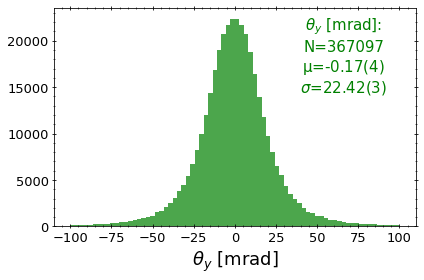

In [18]:
ax, legend = cu.plotHist(df_data['y'][10]*1e3, n_bins=74, prec=2)
cu.textL(ax, 0.8, 0.78, r"$\theta_y$ [mrad]:"+"\n"+str(legend), font_size=15)
ax.set_xlabel(r"$\theta_y$ [mrad]", fontsize=18)
plt.tight_layout()
plt.savefig("fig/Gaus.png", dpi=300)

### Fit a Gaussian

In [ ]:
def sin_unblinded(t, A, b, c):
    return A * np.sin(b * t)+c

#function, X, Y, [starting par]
# Levenberg-Marquardt algorithm as implemented in MINPACK
par, pcov = optimize.curve_fit(sin_unblinded, x, y, sigma=y_err, p0=[0.22, 1.5, -0.1], absolute_sigma=False, method='lm')

par_e = np.sqrt(np.diag(pcov))

print("Params:", par)
print("Errors:", par_e)
print("Cov:", pcov)